# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
online_rt = pd.read_csv("./Online_Retail.csv", encoding="latin1")

In [3]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [4]:
ser = online_rt.groupby("Country").Quantity.agg("sum").sort_values(ascending=False)[1:11]

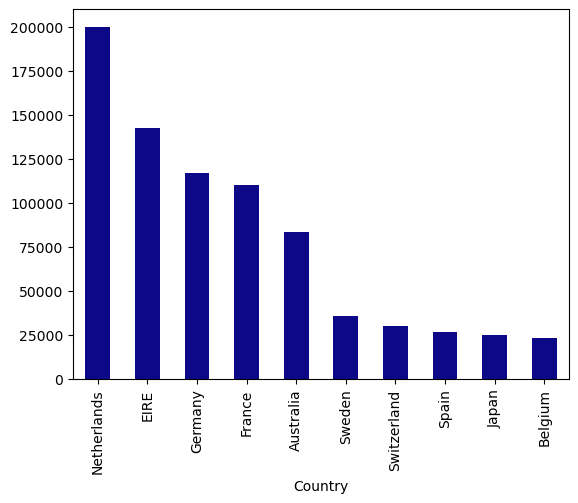

In [5]:
ser.plot.bar(colormap="plasma")

plt.show()

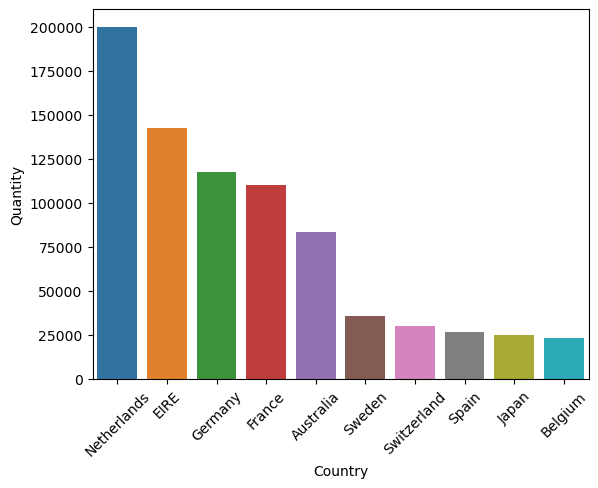

In [6]:
ax = sns.barplot(x=ser.index, y=ser)
xtick_labels = ax.get_xticklabels()
plt.setp(xtick_labels, rotation=45)
plt.show()

### Step 5.  Exclude negative Quantity entries

In [7]:
online_rt = online_rt[online_rt.Quantity > 0]

In [8]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

- What do you mean Quantity per UnitPrice it doesn't make any sense.
- Top 3 countries by what measure? Number of instances in the data? Total number of quantities sold? or, Most revenues?

`Provided solution`

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


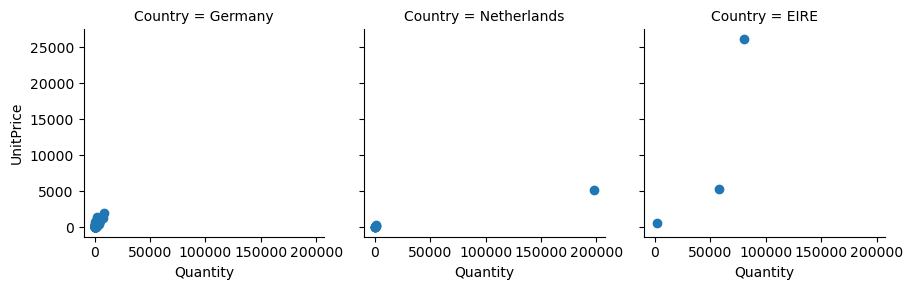

In [9]:
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

plt.show()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [10]:
customers.head(2)

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,Country,,,,,,,
12426.0,Germany,5549855549855549855549855549855549855549855549...,2066520963714592255122554225552241422365223662...,RED RETROSPOT PURSE APPLE BATH SPONGEHANGING J...,258,5/29/11 12:265/29/11 12:265/29/11 12:265/29/11...,118.09,Germany
12427.0,Germany,5368615368615368615368615368615368615368615368...,221492207721249226362263422301223002132821329P...,FELTCRAFT 6 FLOWER FRIENDS6 RIBBONS RUSTIC CHA...,533,12/3/10 10:4412/3/10 10:4412/3/10 10:4412/3/10...,142.26,Germany


`Note:` Well, that's what you get for summing up values that are not meant to be summed.

##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [11]:
customers.UnitPrice.dtype

dtype('float64')

`Well, that piece of code does a lot of things but none are done right.`
1. look what summing all of the columns did. The columns that contained strings are all messed up.
2. even if only the numeric columns were summed still the UnitPrice column shouldn't just be summed like that. It represents the price per unit of a certain order. So first we should add a column of TotalPrice by multiplying each order Quantity with their respective UnitPrice. After that if we've summed it then it would've made more sense.
3. how did you decide on those top 3 countries?

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

`What for?`

In [12]:
online_rt[online_rt.CustomerID == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [13]:
online_rt[online_rt.CustomerID == 12347]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter option. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [14]:
top3_by_sales_vol = online_rt.groupby("Country").Quantity.sum().sort_values(ascending=False)[1:4].index.to_list()

In [15]:
top3_by_sales_vol

['Netherlands', 'EIRE', 'Germany']

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [16]:
online_rt["Revenue"] = online_rt["Quantity"] * online_rt["UnitPrice"]

In [17]:
online_rt.Revenue.agg(["min", "max"])

min    -11062.06
max    168469.60
Name: Revenue, dtype: float64

In [18]:
online_rt.iloc[online_rt.Revenue.argmin()]

InvoiceNo              A563186
StockCode                    B
Description    Adjust bad debt
Quantity                     1
InvoiceDate      8/12/11 14:51
UnitPrice            -11062.06
CustomerID                 NaN
Country         United Kingdom
Revenue              -11062.06
Name: 299983, dtype: object

In [19]:
# we would want to see if there are other negative UnitPrices such as these 
# (Since we dropped all the rows that had negative Quantity)
(online_rt.UnitPrice < 0).value_counts()

UnitPrice
False    531283
True          2
Name: count, dtype: int64

In [20]:
online_rt[online_rt.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom,-11062.06


In the next question since we would groupby the CustomerID, we can drop them now or we can use dropna=True with groupby to ignore those as keys.

##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [21]:
Revenue = online_rt.groupby(["CustomerID", "Country"], dropna=True).agg({"Quantity": "sum", "Revenue": "sum"}).assign(AvgPrice=lambda df_: df_.Revenue / df_.Quantity)

In [22]:
# Since we want the Country column and for each customer id, country is unique we also grouped by country
# Also summing them would have ruined them
Revenue = Revenue.reset_index(1)

In [23]:
Revenue.head()

,Country,Quantity,Revenue,AvgPrice
CustomerID,,,,
12346.0,United Kingdom,74215,77183.60,1.040000
12347.0,Iceland,2458,4310.00,1.753458
12348.0,Finland,2341,1797.24,0.767723
12349.0,Italy,631,1757.55,2.785341
12350.0,Norway,197,334.40,1.697462


In [24]:
data_to_plot = Revenue[Revenue.Country.isin(top3_by_sales_vol)]

In [25]:
data_to_plot

,Country,Quantity,Revenue,AvgPrice
CustomerID,,,,
12426.0,Germany,258,582.73,2.258643
12427.0,Germany,533,825.80,1.549343
12468.0,Germany,366,729.54,1.993279
12471.0,Germany,8212,19824.05,2.414034
12472.0,Germany,4148,6572.11,1.584405
...,...,...,...,...
14016.0,EIRE,2125,4341.21,2.042922
14156.0,EIRE,57885,117379.63,2.027807
14335.0,Germany,379,468.26,1.235515


##### Step 7.3.3 Plot

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


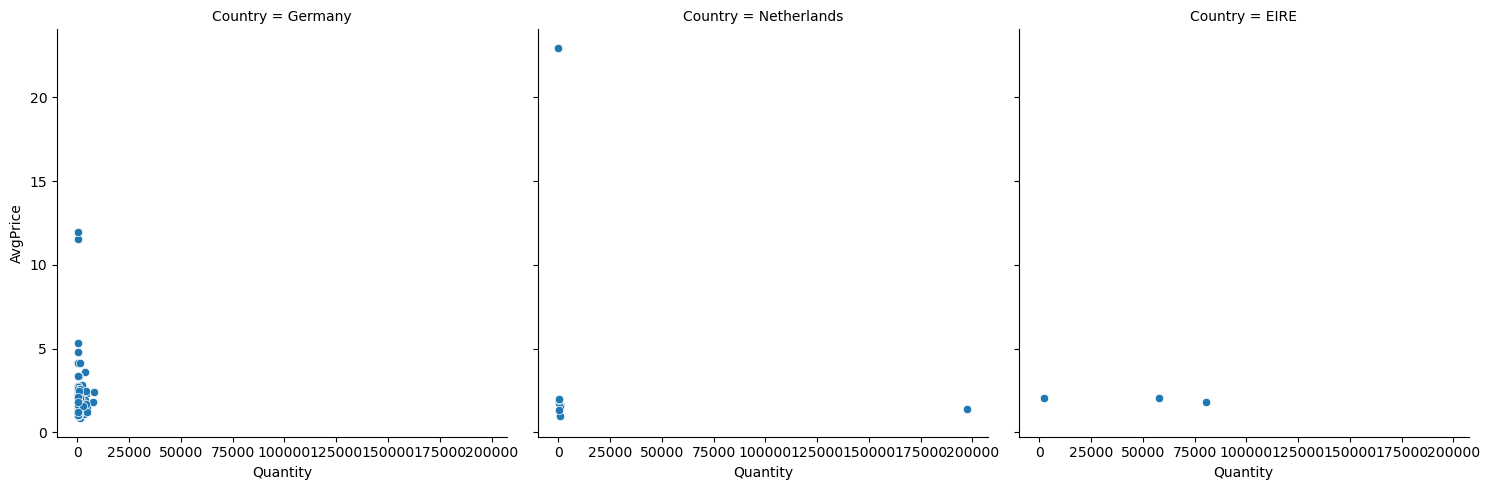

In [26]:
sns.relplot(data=data_to_plot, kind="scatter", x="Quantity", y="AvgPrice", col="Country")

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

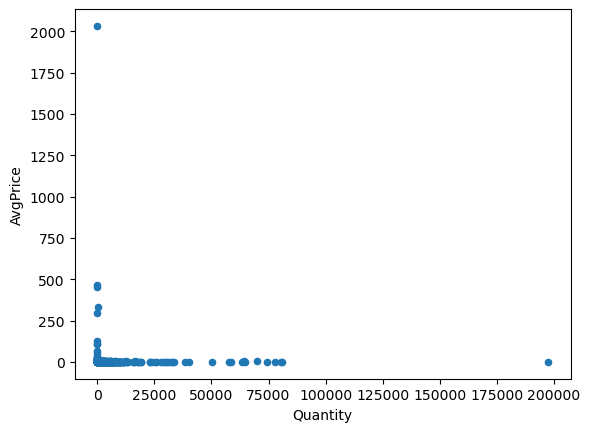

In [27]:
ax = Revenue.plot.scatter(x="Quantity", y="AvgPrice")

##### Step 7.4.2 Zoom in so we can see that curve more clearly

In [28]:
Revenue.Quantity.quantile([0.5, .75, 0.9])

0.50     379.0
0.75     991.5
0.90    2118.4
Name: Quantity, dtype: float64

Probably plotting Quantity in the Y axis and AvgPrice in X axis would better show the relationship.

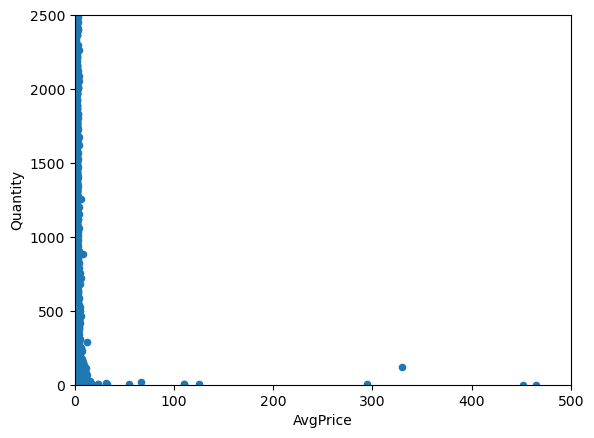

In [29]:
ax1 = Revenue.plot.scatter(y="Quantity", x="AvgPrice")
ax1.set(xlim=(0, 500), ylim=(0, 2500))
plt.show()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [30]:
# what this is trying to say is that in the next step we would like to plot a line plot showing the Revenue
# earned by selling items that are worth (0-1], (1-2] .... (49-50] separately
# i.e, how much revenue did we earn from selling items that are worth (0-1] dollars and so on and so forth

# so what we need is that we want to group the entries based on their UnitPrice into 50 separate groups and 
# sum the Quantities sold and also find the total revenue earned

# this is a good application of binning
bins = np.arange(0, 51)

binned_UnitPrice = pd.cut(online_rt.UnitPrice, bins=bins)

In [31]:
binned_UnitPrice

0         (2, 3]
1         (3, 4]
2         (2, 3]
3         (3, 4]
4         (3, 4]
           ...  
541904    (0, 1]
541905    (2, 3]
541906    (4, 5]
541907    (4, 5]
541908    (4, 5]
Name: UnitPrice, Length: 531285, dtype: category
Categories (50, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (46, 47] < (47, 48] < (48, 49] < (49, 50]]

In [32]:
# now we can groupby this binned UnitPrice series
worth_contributors = online_rt.groupby(binned_UnitPrice).agg({"Quantity": "sum", "Revenue": "sum"}).reset_index()

In [33]:
worth_contributors.tail()

,UnitPrice,Quantity,Revenue
45,"(45, 46]",1,46.00
46,"(46, 47]",2,92.99
47,"(47, 48]",2,95.67
48,"(48, 49]",0,0.00
49,"(49, 50]",176,8796.85


#### 8.3 Plot.

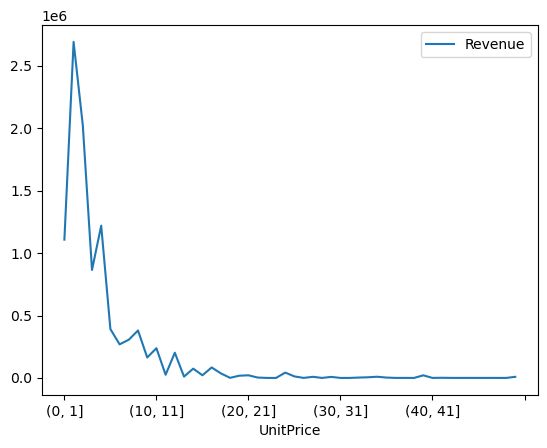

In [34]:
ax = worth_contributors.plot.line(x="UnitPrice", y="Revenue")

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

In [35]:
xtick_labels = ["$" + str(worth) for worth in range(0, 50, 5)]
ax.set_xticks(range(0, 50, 5), xtick_labels, rotation=45);

In [36]:
yticks = ax.get_yticks()

In [37]:
ytick_labels = ["$" + str(rev) + "M" for rev in list(yticks/10**6)]
ax.set_yticks(yticks, ytick_labels);

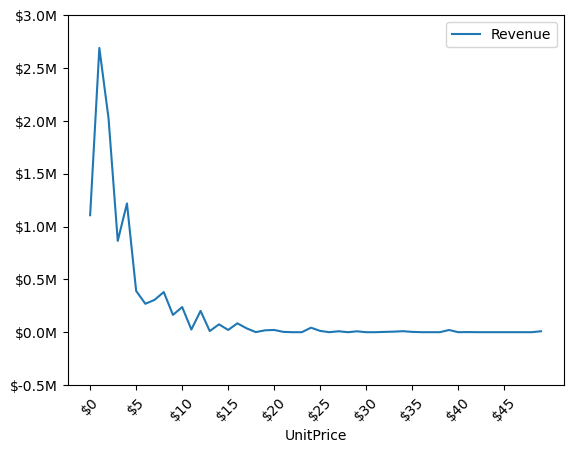

In [38]:
plt.sca(ax)
plt.show()

### BONUS: Create your own question and answer it.